In [14]:
import os
import json
import glob
import SimpleITK as sitk 
import pandas as pd 

from data_utils import dicom_metainfo,dicom2array,get_annotation_info

trainPath = "../../../Datasets/lumbar/train"
jsonPath = "../../../Datasets/lumbar/lumbar_train51_annotation.json"

annotations = get_annotation_info(trainPath,jsonPath)
print(annotations.index[0])
print(annotations[annotations.index[0]])


../../../Datasets/lumbar/train\study41\image17.dcm
[{'annotator': 72, 'data': {'point': [{'tag': {'identification': 'L5', 'vertebra': 'v2'}, 'coord': [169, 252], 'zIndex': 5}, {'tag': {'identification': 'L4', 'vertebra': 'v2'}, 'coord': [169, 224], 'zIndex': 5}, {'tag': {'identification': 'L3', 'vertebra': 'v2'}, 'coord': [171, 194], 'zIndex': 5}, {'tag': {'identification': 'L2', 'vertebra': 'v2'}, 'coord': [172, 161], 'zIndex': 5}, {'tag': {'identification': 'L1', 'vertebra': 'v2'}, 'coord': [175, 126], 'zIndex': 5}, {'tag': {'identification': 'L5-S1', 'disc': 'v3'}, 'coord': [171, 270], 'zIndex': 5}, {'tag': {'identification': 'L4-L5', 'disc': 'v2'}, 'coord': [169, 238], 'zIndex': 5}, {'tag': {'identification': 'L3-L4', 'disc': 'v3'}, 'coord': [171, 209], 'zIndex': 5}, {'tag': {'identification': 'L2-L3', 'disc': 'v2'}, 'coord': [171, 175], 'zIndex': 5}, {'tag': {'identification': 'L1-L2', 'disc': 'v5'}, 'coord': [172, 145], 'zIndex': 5}, {'tag': {'identification': 'T12-L1', 'disc': '

In [15]:
anno = annotations[0][0]["data"]["point"]
print(anno)

[{'tag': {'identification': 'L5', 'vertebra': 'v2'}, 'coord': [169, 252], 'zIndex': 5}, {'tag': {'identification': 'L4', 'vertebra': 'v2'}, 'coord': [169, 224], 'zIndex': 5}, {'tag': {'identification': 'L3', 'vertebra': 'v2'}, 'coord': [171, 194], 'zIndex': 5}, {'tag': {'identification': 'L2', 'vertebra': 'v2'}, 'coord': [172, 161], 'zIndex': 5}, {'tag': {'identification': 'L1', 'vertebra': 'v2'}, 'coord': [175, 126], 'zIndex': 5}, {'tag': {'identification': 'L5-S1', 'disc': 'v3'}, 'coord': [171, 270], 'zIndex': 5}, {'tag': {'identification': 'L4-L5', 'disc': 'v2'}, 'coord': [169, 238], 'zIndex': 5}, {'tag': {'identification': 'L3-L4', 'disc': 'v3'}, 'coord': [171, 209], 'zIndex': 5}, {'tag': {'identification': 'L2-L3', 'disc': 'v2'}, 'coord': [171, 175], 'zIndex': 5}, {'tag': {'identification': 'L1-L2', 'disc': 'v5'}, 'coord': [172, 145], 'zIndex': 5}, {'tag': {'identification': 'T12-L1', 'disc': 'v5'}, 'coord': [176, 108], 'zIndex': 5}]


id:L5,vertebra:v2,zIndex:5
id:L4,vertebra:v2,zIndex:5
id:L3,vertebra:v2,zIndex:5
id:L2,vertebra:v2,zIndex:5
id:L1,vertebra:v2,zIndex:5
id:L5-S1,disc:v3,zIndex:5
id:L4-L5,disc:v2,zIndex:5
id:L3-L4,disc:v3,zIndex:5
id:L2-L3,disc:v2,zIndex:5
id:L1-L2,disc:v5,zIndex:5
id:T12-L1,disc:v5,zIndex:5


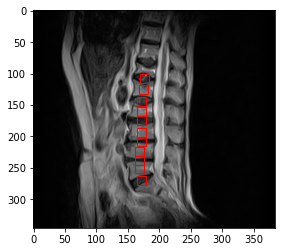

In [18]:
import matplotlib.pyplot as plt 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for an in anno:
    corrd = an["coord"]
    top_left_x,top_left_y = corrd[0]-7,corrd[1]-7
    width,height = 14,14
    rect = plt.Rectangle((top_left_x,top_left_y),width,height,fill=False,edgecolor="red",linewidth=1)
    ax.add_patch(rect)

    tag = an["tag"]
    ver = None
    disc = None
    if "vertebra" in tag:
        ver = tag["vertebra"]
    elif "disc" in tag:
        disc = tag["disc"]
    
    identity = tag["identification"]
    zIndex = an["zIndex"]

    if ver is not None:
        print("id:{},vertebra:{},zIndex:{}".format(identity,ver,zIndex))
    elif disc is not None:
        print("id:{},disc:{},zIndex:{}".format(identity,disc,zIndex))

plt.imshow(img,cmap="gray")
